# Trabalho 02 : realce e superresolução - 01/2021

**Nome:** Luís Felipe Ribeiro Chaves
 
**NUSP:** 10801221

BCC/018

### Imports necessários

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

### Leitura de parametros

In [ ]:
file = input().rstrip()
fn = int(input())
n = int(input())

if fn == 1:
    ws = list(float(el) for el in input().rstrip().split(' '))
    ws = np.array(ws)
elif fn == 2:
    ws = []
    for _ in range(n):
        weigth = list(float(el) for el in input().rstrip().split(' '))
        ws.append(weigth)
    ws = np.array(ws)

In [2]:
fn = 1
if fn == 1:
    file = 'ImagensParaCasosDeTeste/image01.png'
    n = 7
    ws = [-3, -2, -1, 0, 1, 2, 3]
    ws = np.array(ws)
elif fn == 2:
    file = 'ImagensParaCasosDeTeste/flower.png'
    n = 5
    ws = [
        [-1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1],
        [-1, -1, 24, -1, -1],
        [-1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1]
    ]
    ws = np.array(ws)
else:
    file = 'ImagensParaCasosDeTeste/camera_saltpepper.png'
    n = 5

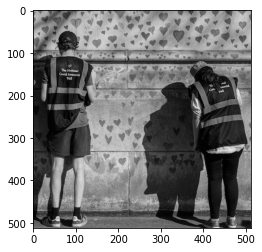

In [3]:
img = imageio.imread(file)
plt.imshow(img, cmap='gray')

In [4]:
if fn == 1:
    img_flatten = img.flatten()
    padding = n // 2
    img_filtered = np.zeros(img_flatten.shape)
    img_flatten = np.pad(img_flatten, padding, mode='wrap')
    
    for i in range(img_filtered.size):
        img_filtered[i] = np.sum(img_flatten[i : i + n] * ws)
        
    img_filtered = np.reshape(img_filtered, img.shape)
    
elif fn == 2:
    shapeX, shapeY = img.shape
    img_filtered = np.zeros(img.shape)
    img_padded = np.pad(img, n // 2, mode='edge')
    
    for i in range(shapeX):
        for j in range(shapeY):
            img_filtered[i, j] = np.sum(
                img_padded[i : i + n, j : j + n] * ws
            )
else:
    shapeX, shapeY = img.shape
    img_filtered = np.zeros(img.shape)
    img_padded = np.pad(img, n // 2, mode='constant')
    
    for i in range(shapeX):
        for j in range(shapeY):
            img_filtered[i, j] = np.median(img_padded[i : i + n, j : j + n])

### Normalização

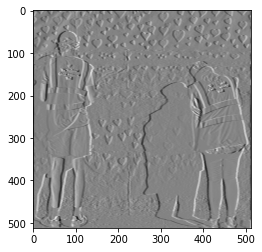

In [5]:
min_img = img_filtered.min()
diff = img_filtered.max() - min_img
img_filtered = (img_filtered - min_img) * 255 / diff

plt.imshow(img_filtered, cmap='gray')

### Erro

In [6]:
rmse = np.sqrt(np.mean((img - img_filtered) ** 2))
print(rmse)

71.1946059981234
